In [29]:
 import os

import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import torch_geometric as pyg
# enable multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pyg.seed.seed_everything(1234)

In [30]:
%cd /Users/cgu3/Documents/Grape-Pi
%pwd

/Users/cgu3/Documents/Grape-Pi


/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/Grape-Pi'

In [69]:
!python grape_pi.py --cfg configs/protein/grapepi_sageconv.yaml --threshold 0.9 --num-promoted 100 --output saved_results/yeast_ORBI_sageconv/evaluation_test --override "dataset.dir=data/yeast-ORBI dataset.label_col=y run.name=yeast_ORBI_sageconv 'dataset.node_numeric_cols=[protein_probability, mRNA]'" 

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (mp): GNNStackStage(
      (layer0): GeneralLayer(
        (layer): SAGEConv(
          (model): SAGEConv(10, 10, aggr=mean)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/yeast-ORBI
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_ratio:

In [71]:
!python grape_pi.py --cfg configs/protein/grapepi_sageconv.yaml --checkpoint results/yeast_ORBI_sageconv/1234/ckpt/epoch=299-step=4800.ckpt --threshold 0.9 --num-promoted 100 --output saved_results/yeast_LCQ_sageconv/evaluation_test --override "dataset.dir=data/yeast-LCQ dataset.label_col=y run.name=yeast_LCQ_sageconv 'dataset.node_numeric_cols=[protein_probability, mRNA]'" 

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (mp): GNNStackStage(
      (layer0): GeneralLayer(
        (layer): SAGEConv(
          (model): SAGEConv(10, 10, aggr=mean)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/yeast-LCQ
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_ratio: 

In [72]:
dat_ORBI = pd.read_csv('saved_results/yeast_LCQ_sageconv/evaluation_test/all_proteins.csv')
dat_LCQ = pd.read_csv('saved_results/yeast_ORBI_sageconv/evaluation_test/all_proteins.csv')

In [73]:
# only keep protein with probability > 0.9 for both datasets
dat_ORBI = dat_ORBI[dat_ORBI['protein_probability'] < 0.9]
dat_LCQ = dat_LCQ[dat_LCQ['protein_probability'] < 0.9]
# filter only proteins that are in both datasets
common_proteins = set(dat_ORBI['protein']).intersection(set(dat_LCQ['protein']))
dat_ORBI = dat_ORBI[dat_ORBI['protein'].isin(common_proteins)]
dat_LCQ = dat_LCQ[dat_LCQ['protein'].isin(common_proteins)]

In [74]:
# calculate correlation between the two datasets for pred_prob
dat_ORBI['pred_prob'].corr(dat_LCQ['pred_prob'], method='spearman')

0.7719897182236061

Text(0.5, 0.1, 'spearman correlation 0.77')

Text(0.5, 0, 'yeast_LCQ')

Text(0, 0.5, 'yeast_ORBI')

Text(0.5, 1.0, 'Scatter plot for predicted probability between yeast_LCQ and yeast_ORBI')

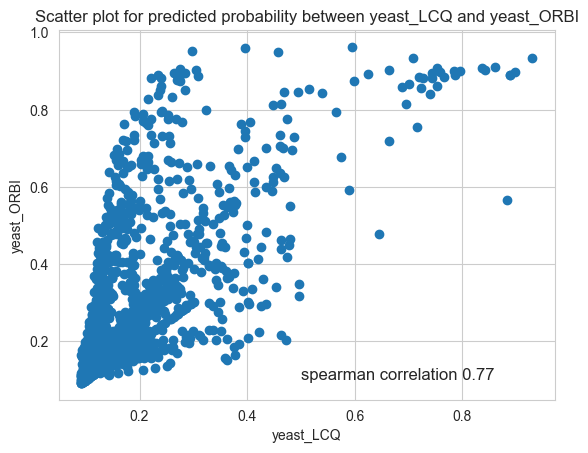

In [87]:
# plot the correlation between the two datasets for pred_prob
plt.scatter(dat_ORBI['pred_prob'], dat_LCQ['pred_prob'])
# add spearman correlation
spearman_corr = round(dat_ORBI['pred_prob'].corr(dat_LCQ['pred_prob'], method='spearman'),2 )
plt.text(0.5, 0.1, f'spearman correlation {spearman_corr}', fontsize=12) 
plt.xlabel('yeast_LCQ')
plt.ylabel('yeast_ORBI')
plt.title('Scatter plot for predicted probability between yeast_LCQ and yeast_ORBI')
plt.show()

In [75]:
dat_ORBI['protein_probability'].corr(dat_LCQ['protein_probability'], method='spearman')

0.0645144130352635

Text(0.5, 0, 'yeast_LCQ')

Text(0, 0.5, 'yeast_ORBI')

Text(0.5, 0.1, 'spearman correlation 0.06')

Text(0.5, 1.0, 'Scatter plot for raw probability between yeast_LCQ and yeast_ORBI')

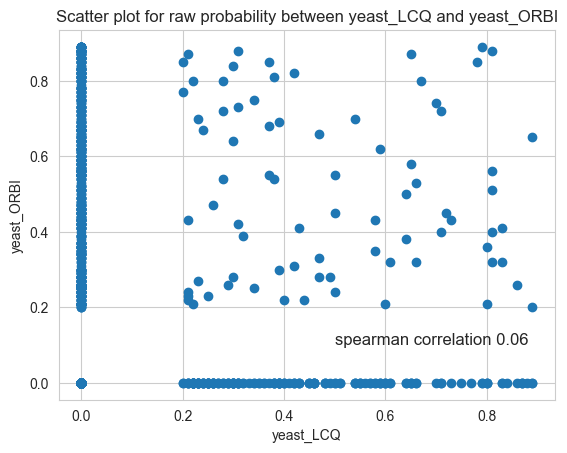

In [88]:
plt.scatter(dat_ORBI['protein_probability'], dat_LCQ['protein_probability'])    
plt.xlabel('yeast_LCQ')
plt.ylabel('yeast_ORBI')
spearman_corr = round(dat_ORBI['protein_probability'].corr(dat_LCQ['protein_probability'], method='spearman'),2 )
plt.text(0.5, 0.1, f'spearman correlation {spearman_corr}', fontsize=12)
plt.title('Scatter plot for raw probability between yeast_LCQ and yeast_ORBI')
plt.show()